In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
datapath = '/content/drive/MyDrive/output/output/'

#Ideal

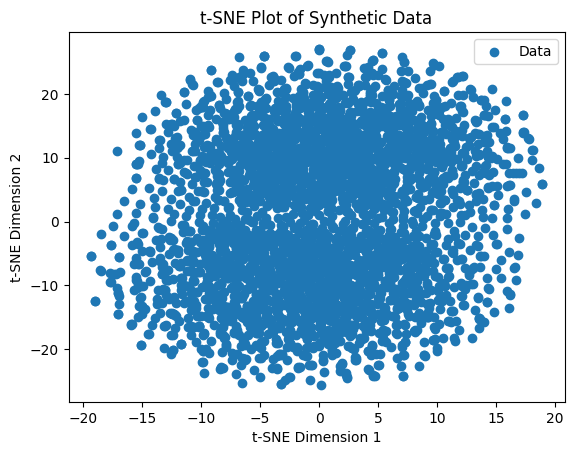

In [ ]:
from sklearn.datasets import make_classification
from sklearn.manifold import TSNE

# Function to generate synthetic data and calculate t-SNE plot
def generate_and_plot_clusters():
    # Generate synthetic data with clear separation
    synthetic_data, _ = make_classification(n_samples=3553, n_features=768, n_informative=768,
                                            n_redundant=0, n_clusters_per_class=1, random_state=42)

    # Calculate t-SNE plot
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(synthetic_data)

    # Scatter plot of t-SNE results
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], label='Data')

    # Add labels and legend
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.title('t-SNE Plot of Synthetic Data')
    plt.legend()

    # Show the plot
    plt.show()

# Generate and plot clusters
generate_and_plot_clusters()

In [ ]:
whyh1,h1_i = np.histogram(arri,bins=arri.shape[0])
items = np.sum(h1)
total_pairs = np.cumsum(h1)

In [ ]:
h1_i[-2]=(h1[-1]+h1[-2])/2
h1_i=np.delete(h1_i,-1)
cdf = np.cumsum(h1_i)
cdf_n = (cdf-np.min(cdf))/(np.max(cdf)-np.min(cdf))

#MR cos sim

In [4]:
train = pd.read_csv(datapath + 'train10.csv')
test = pd.read_csv(datapath + 'test10.csv')

In [5]:
datapath2 = '/content/drive/MyDrive/data/MR_toy/'

In [6]:
train_data = pd.read_csv(datapath2 + 'train.csv')
val_data = pd.read_csv(datapath2 + 'val.csv')
test_data = pd.read_csv(datapath2 + 'test.csv')

train_data = pd.concat([train_data, val_data], axis = 0, ignore_index= True)
train_data = train_data.rename(columns={"Unnamed: 0": "Index", "text": "text", "label":"label"})

In [7]:
test_data = test_data.rename(columns={"Unnamed: 0": "Index", "text": "text", "label":"label"})
train_data=train_data.sort_values(by=['label'],ascending=False)

In [8]:
# train_labels =np.array(train_labels)
train0 = train[train_data['label'] == 0]
train1 = train[train_data['label'] == 1]
# test_labels =np.array(test_labels)
test0 = test[test_data['label']== 0]
test1 = test[test_data['label']== 1]

<ipython-input-8-5b541258a0f6>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train0 = train[train_data['label'] == 0]
<ipython-input-8-5b541258a0f6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train1 = train[train_data['label'] == 1]


<ipython-input-154-56a70526db9d>:3: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  C = np.matmul(emb1, np.transpose(emb2))
<ipython-input-154-56a70526db9d>:10: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the curr

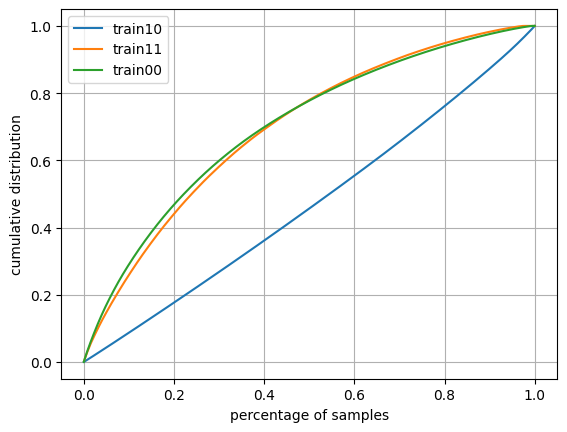

In [ ]:
emb1 = train1
emb2 = train0
C = np.matmul(emb1, np.transpose(emb2))
U = np.sort(C.values.flatten())
U = np.abs(-1 - U)  # distance
x = np.linspace(1, len(U), len(U)) / len(U)
cs = np.cumsum(U)
plt.plot(x, cs/cs[-1])

C11 = np.matmul(emb1, np.transpose(emb1))/1
U11 = np.sort(C11.values.flatten())
U11 = np.abs(1 - U11)  # distance
x11 = np.linspace(1, len(U11), len(U11)) / len(U11)
cs11 = np.cumsum(U11)
plt.plot(x11, cs11/cs11[-1])

C00 = np.matmul(emb2, np.transpose(emb2))/1
U00 = np.sort(C00.values.flatten())
U00 = np.abs(1 - U00)  # distance
x00 = np.linspace(1, len(U00), len(U00)) / len(U00)
cs00 = np.cumsum(U00)
plt.plot(x00, cs00/cs00[-1])
plt.grid(which='both')
plt.xlabel('percentage of samples')
plt.ylabel('cumulative distribution')
plt.legend(['train10','train11','train00'])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances
# Compute cosine similarity of train0 and test1
cos_sim00 = np.exp(cosine_similarity(test0, train0))
cos_sim01 = np.exp(cosine_similarity(test0, train1))
cos_sim10 = np.exp(cosine_similarity(test1, train0))
cos_sim11 = np.exp(cosine_similarity(test1, train1))
cost_sim11 = np.exp(cosine_similarity(train1, train1))
cost_sim00 = np.exp(cosine_similarity(train0, train0))
cost_sim01 = np.exp(cosine_similarity(train0, train1))

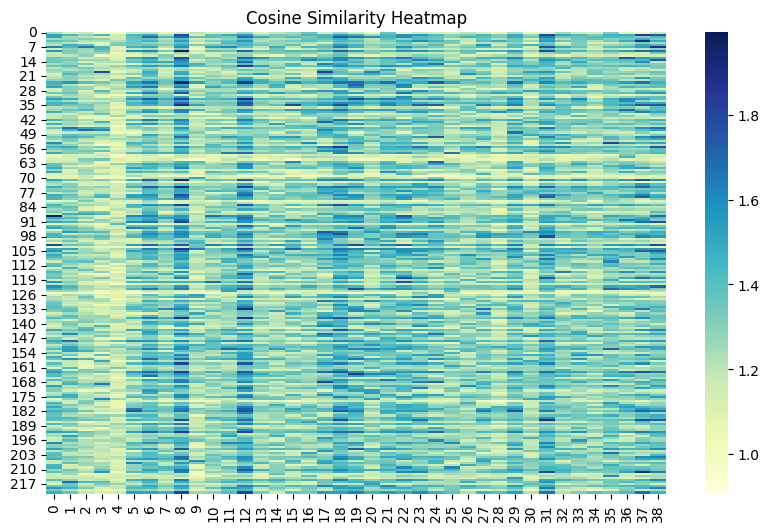

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

plt.figure(figsize=(10, 6))
# Create a heatmap
sns.heatmap(cos_sim10, cmap="YlGnBu")
plt.title("Cosine Similarity Heatmap")
plt.show()

In [ ]:
dfs00=dfs00.sort_values(by=['sim'],ascending=False)
dfs00

,test0_ID,train_text0,sim,train_text00
1193,1193,it won't be long before you'll spy i spy at a ...,0.798337,"same song , second verse , coulda been better ..."
1099,1099,". . . an airless , prepackaged julia roberts w...",0.796700,the kind of primal storytelling that george lu...
2156,2156,do we really need another film that praises fe...,0.794428,kaufman and jonze take huge risks to ponder th...
2804,2804,"an unpredictable blend of gal-pal smart talk ,...",0.790654,judith and zaza's extended bedroom sequence . ...
973,973,an affable but undernourished romantic comedy ...,0.789159,hashiguchi covers this territory with wit and ...
...,...,...,...,...
1567,1567,the rollerball sequences feel sanitised and st...,0.292664,this surreal gilliam-esque film is also a trou...
1486,1486,"at times , the suspense is palpable , but by t...",0.291851,a rare and lightly entertaining look behind th...
1314,1314,if you enjoy being rewarded by a script that a...,0.287411,"shot in rich , shadowy black-and-white , devil..."
800,800,one can only assume that the jury who bestowed...,0.275609,"if it tried to do anything more , it would fai..."


In [ ]:
dfs00.head(21).to_csv("Most similarity.csv")

In [ ]:
dfs00.tail(21).to_csv("Least similarity.csv")

In [ ]:
x = np.amax(cos_sim01, axis=1)
y = np.argmax(cos_sim01,axis=1)

print(x)
print(y)
print(cosine_similarity([test0.iloc[0]], [train1.iloc[y[0]]]))

[0.82141437 0.76562722 0.53318466 ... 0.52925626 0.59029354 0.54041119]
[2638 3414 1197 ... 1613  212  510]
[[0.82141437]]


In [ ]:
print(y[4])

2549


In [ ]:
x10 = np.amax(cos_sim10, axis=1)
y10 = np.argmax(cos_sim10,axis=1)

In [ ]:
df = pd.DataFrame(columns=['test0_ID','test_text','sim', 'train_text'])

In [ ]:
train_data.iloc[2549]["text"]

'noyce has worked wonders with the material .'

In [ ]:
for i in range(x.shape[0]):
  df = df.append({'test0_ID' : i, 'test_text' :test_data["text"][i+1776] ,'sim':x[i], 'train_text' : train_data.iloc[y[i]]["text"]},ignore_index = True)

<ipython-input-64-7b0544563b09>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'test0_ID' : i, 'test_text' :test_data["text"][i+1776] ,'sim':x[i], 'train_text' : train_data.iloc[y[i]]["text"]},ignore_index = True)
<ipython-input-64-7b0544563b09>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'test0_ID' : i, 'test_text' :test_data["text"][i+1776] ,'sim':x[i], 'train_text' : train_data.iloc[y[i]]["text"]},ignore_index = True)
<ipython-input-64-7b0544563b09>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'test0_ID' : i, 'test_text' :test_data["text"][i+1776] ,'sim':x[i], 'train_text' : train_data.iloc[y[i]]["text"]},ignore_index = True)
<ipython-input-64-7b0544563b09>:2: Fu

In [ ]:
df

,test0_ID,test_text,sim,train_text
0,0,although the film boils down to a lightweight ...,0.821414,while tattoo borrows heavily from both seven a...
1,1,not always too whimsical for its own good ( bu...,0.765627,there aren't too many films that can be as sim...
2,2,"waydowntown may not be an important movie , or...",0.533185,"while the filmmaking may be a bit disjointed ,..."
3,3,lacks dramatic punch and depth . \n,0.447837,"lasker's canny , meditative script distances s..."
4,4,sunshine state surveys the landscape and asses...,0.565830,noyce has worked wonders with the material .
...,...,...,...,...
1771,1771,none of this is half as moving as the filmmake...,0.442428,much of this slick and sprightly cgi feature i...
1772,1772,[t]he script isn't up to the level of the dire...,0.566377,legendary irish writer brendan behan's memoir ...
1773,1773,strangely comes off as a kingdom more mild tha...,0.529256,"a whole lot of fun and funny in the middle , t..."
1774,1774,"devolves into the derivative , leaning on badl...",0.590294,together writer-director danny verete's three ...


In [ ]:
df.to_csv('file01.csv')

In [ ]:
df1 = pd.DataFrame(columns=['test1_ID','test_text','sim','train_text'])

In [ ]:
for i in range(x10.shape[0]):
  df1 = df1.append({'test1_ID' : i, 'test_text' :test_data["text"][i] ,'sim':x10[i], 'train_text' : train_data["text"][y10[i]+3554]},ignore_index = True)

<ipython-input-22-d8d0a91aa827>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({'test1_ID' : i, 'test_text' :test_data["text"][i] ,'sim':x10[i], 'train_text' : train_data["text"][y10[i]+3554]},ignore_index = True)
<ipython-input-22-d8d0a91aa827>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({'test1_ID' : i, 'test_text' :test_data["text"][i] ,'sim':x10[i], 'train_text' : train_data["text"][y10[i]+3554]},ignore_index = True)
<ipython-input-22-d8d0a91aa827>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({'test1_ID' : i, 'test_text' :test_data["text"][i] ,'sim':x10[i], 'train_text' : train_data["text"][y10[i]+3554]},ignore_index = True)
<ipython-input-22-d8d0a91aa827>:2:

In [ ]:
df1

,test1_ID,test_text,sim,train_text
0,0,the animated sequences are well done and perfe...,0.646030,"the smash 'em-up , crash 'em-up , shoot 'em-up..."
1,1,a great companion piece to other napoleon film...,0.471911,elegantly produced and expressively performed ...
2,2,. . . spellbinding fun and deliciously exploi...,0.623607,that frenetic spectacle [on the tv show] has u...
3,3,in its treatment of the dehumanizing and ego-d...,0.524547,flaccid drama and exasperatingly slow journey .
4,4,it's usually a bad sign when directors abandon...,0.658811,the beautiful images and solemn words cannot d...
...,...,...,...,...
1772,1772,puts to rest any thought that the german film ...,0.466476,"its maker , steven spielberg , hasn't had so m..."
1773,1773,there is a general air of exuberance in all ab...,0.471170,to show these characters in the act and give t...
1774,1774,"there are no special effects , and no hollywoo...",0.540738,even legends like alfred hitchcock and john hu...
1775,1775,recalls quiet freak-outs like l'avventura and ...,0.617699,nothing more than a widget cranked out on an a...


In [ ]:
df1.to_csv('file10.csv')

<Axes: xlabel='test0_ID'>

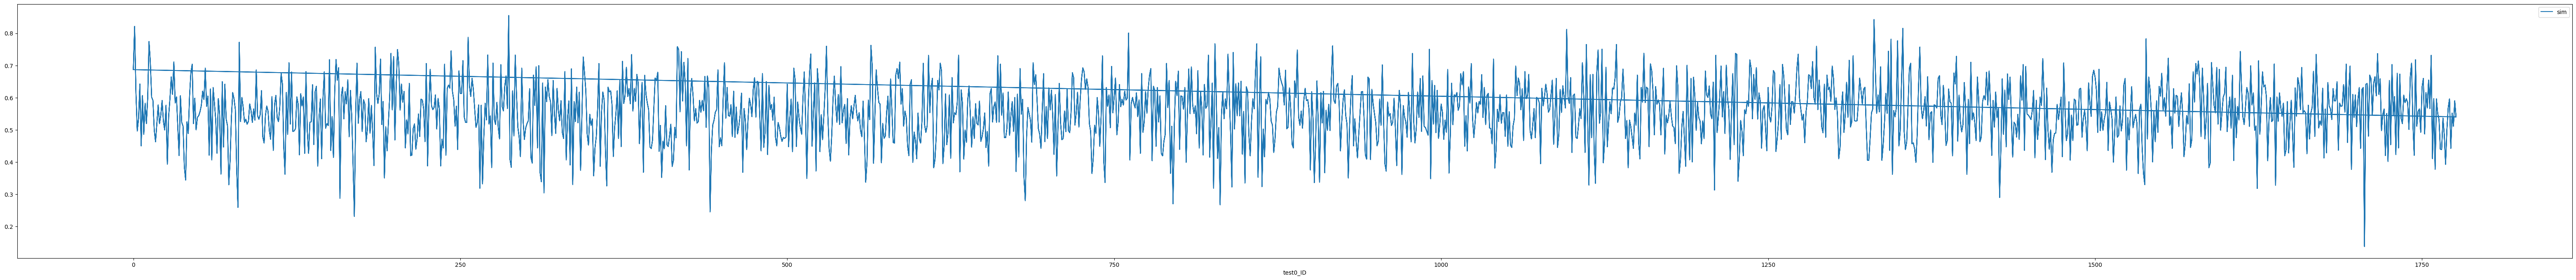

In [ ]:
df.plot(x='test0_ID',y='sim',figsize=(80,8),kind="line")

In [ ]:
cos_sim01.shape

(1777, 3554)

##Epoch 10


In [ ]:
train10 = pd.read_csv(datapath + '/train_emb10.csv')
test10 = pd.read_csv(datapath + '/test_emb10.csv')

In [ ]:
train_data = pd.read_csv(datapath2 + 'train.csv')
val_data = pd.read_csv(datapath2 + 'val.csv')
test_data = pd.read_csv(datapath2 + 'test.csv')

train_data = pd.concat([train_data, val_data], axis = 0, ignore_index= True)
train_data = train_data.rename(columns={"Unnamed: 0": "Index", "text": "text", "label":"label"})

In [ ]:
test_data = test_data.rename(columns={"Unnamed: 0": "Index", "text": "text", "label":"label"})

In [ ]:
# train_labels =np.array(train_labels)
train0_10 = train10[train_data['label'] == 0]
train1_10 = train10[train_data['label'] == 1]

<ipython-input-249-4f9845e7598e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train0_10 = train10[train_data['label'] == 0]
<ipython-input-249-4f9845e7598e>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train1_10 = train10[train_data['label'] == 1]


In [ ]:
# test_labels =np.array(test_labels)
test0_10 = test10[test_data['label']== 0]
test1_10 = test10[test_data['label']== 1]

<ipython-input-250-dd22782faf7c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test0_10 = test10[test_data['label']== 0]
<ipython-input-250-dd22782faf7c>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test1_10 = test10[test_data['label']== 1]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity of train0 and test1
cos_sim02 = cosine_similarity(test0_10, train1_10)

# Display the cosine similarities
print("Cosine Similarities:")
print(cos_sim02)

Cosine Similarities:
[[ 4.42351974e-03  4.48928335e-03  9.92669114e-01 ...  9.94273749e-01
   9.91020995e-01  8.03190409e-03]
 [ 9.94717484e-01  9.89743773e-01 -8.51325405e-03 ... -8.45097735e-04
   1.16833439e-02  9.84317277e-01]
 [ 3.37356317e-01  3.45796518e-01  8.79173157e-01 ...  8.84767667e-01
   8.92118302e-01  3.51039026e-01]
 ...
 [ 9.96266106e-01  9.93618337e-01 -7.38132130e-03 ...  1.06800277e-03
   1.36204513e-02  9.86492743e-01]
 [ 9.94979439e-01  9.92552411e-01 -6.12395931e-03 ...  1.89998460e-03
   1.46720914e-02  9.84030639e-01]
 [ 8.39904527e-02  8.87018101e-02  9.65320707e-01 ...  9.70806566e-01
   9.72477736e-01  9.15658802e-02]]


In [ ]:
cos_sim02.shape

(1776, 3554)

In [ ]:
x = np.amax(cos_sim02, axis=1)
y = np.argmax(cos_sim02,axis=1)

In [ ]:
x1 = np.amin(cos_sim02, axis=1)
y2 = np.argmin(cos_sim02,axis=1)

In [ ]:
df2 = pd.DataFrame(columns=['test0_ID','test_text','train1_ID','train_text','sim'])

In [ ]:
for i in range(x.shape[0]):
  df2 = df2.append({'test0_ID' : i, 'test_text' :test_data["text"][i] , 'train1_ID' : train_data["Index"][y[i]],'train_text': train_data["text"][y[i]],'sim':x[i]},ignore_index = True)

<ipython-input-153-904c1cf06bcf>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'test0_ID' : i, 'test_text' :test_data["text"][i] , 'train1_ID' : train_data["Index"][y[i]],'train_text': train_data["text"][y[i]],'sim':x[i]},ignore_index = True)
<ipython-input-153-904c1cf06bcf>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'test0_ID' : i, 'test_text' :test_data["text"][i] , 'train1_ID' : train_data["Index"][y[i]],'train_text': train_data["text"][y[i]],'sim':x[i]},ignore_index = True)
<ipython-input-153-904c1cf06bcf>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'test0_ID' : i, 'test_text' :test_data["text"][i] , 'train1_ID' : train_data["Index"][y[i]],'train_text':

In [ ]:
df2

,test0_ID,test_text,train1_ID,train_text,sim
0,0,the animated sequences are well done and perfe...,6353,"an "" o bruin , where art thou ? "" -style cross...",0.996401
1,1,a great companion piece to other napoleon film...,2084,a breezy romantic comedy that has the punch of...,0.998367
2,2,. . . spellbinding fun and deliciously exploi...,6218,you . . . get a sense of good intentions derai...,0.958592
3,3,in its treatment of the dehumanizing and ego-d...,2313,"creepy , authentic and dark . this disturbing ...",0.997638
4,4,it's usually a bad sign when directors abandon...,4550,a sermonizing and lifeless paean to teenage du...,0.994191
...,...,...,...,...,...
1771,1771,ms . hutchins is talented enough and charismat...,5138,the movie is so resolutely cobbled together ou...,0.995938
1772,1772,puts to rest any thought that the german film ...,5053,sewer rats could watch this movie and be so sk...,0.998355
1773,1773,there is a general air of exuberance in all ab...,5225,a dreary rip-off of goodfellas that serves as ...,0.998686
1774,1774,"there are no special effects , and no hollywoo...",3680,as saccharine as it is disposable .,0.997808


In [ ]:
df3 = pd.DataFrame(columns=['test0_ID','test_text','train1_ID','train_text','sim','sim_max'])

In [ ]:
for i in range(x.shape[0]):
  df3= df3.append({'test0_ID' : i, 'test_text' :test_data["text"][i] ,'train_text': train_data["text"][y[i]],'sim':x1[i],'sim_max':x[i]},ignore_index = True)

<ipython-input-168-10630339306f>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3= df3.append({'test0_ID' : i, 'test_text' :test_data["text"][i] ,'train_text': train_data["text"][y[i]],'sim':x1[i],'sim_max':x[i]},ignore_index = True)
<ipython-input-168-10630339306f>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3= df3.append({'test0_ID' : i, 'test_text' :test_data["text"][i] ,'train_text': train_data["text"][y[i]],'sim':x1[i],'sim_max':x[i]},ignore_index = True)
<ipython-input-168-10630339306f>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3= df3.append({'test0_ID' : i, 'test_text' :test_data["text"][i] ,'train_text': train_data["text"][y[i]],'sim':x1[i],'sim_max':x[i]},ignore_index = True)
<ipython-input-168-

In [ ]:
df3

,test0_ID,test_text,train1_ID,train_text,sim,sim_max
0,0,the animated sequences are well done and perfe...,NaN,"an "" o bruin , where art thou ? "" -style cross...",-0.017250,0.996401
1,1,a great companion piece to other napoleon film...,NaN,a breezy romantic comedy that has the punch of...,-0.144538,0.998367
2,2,. . . spellbinding fun and deliciously exploi...,NaN,you . . . get a sense of good intentions derai...,0.320030,0.958592
3,3,in its treatment of the dehumanizing and ego-d...,NaN,"creepy , authentic and dark . this disturbing ...",-0.148960,0.997638
4,4,it's usually a bad sign when directors abandon...,NaN,a sermonizing and lifeless paean to teenage du...,-0.143453,0.994191
...,...,...,...,...,...,...
1771,1771,ms . hutchins is talented enough and charismat...,NaN,the movie is so resolutely cobbled together ou...,-0.145382,0.995938
1772,1772,puts to rest any thought that the german film ...,NaN,sewer rats could watch this movie and be so sk...,-0.147394,0.998355
1773,1773,there is a general air of exuberance in all ab...,NaN,a dreary rip-off of goodfellas that serves as ...,-0.147465,0.998686
1774,1774,"there are no special effects , and no hollywoo...",NaN,as saccharine as it is disposable .,-0.142855,0.997808


from matplotlib import pyplot as plt
df3['sim'].plot(kind='hist', bins=20, title='sim')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df3['sim_max'].plot(kind='hist', bins=20, title='sim_max')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df3.plot(kind='scatter', x='sim', y='sim_max', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df3['sim'].plot(kind='line', figsize=(8, 4), title='sim')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df3['sim_max'].plot(kind='line', figsize=(8, 4), title='sim_max')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
cos_sim10.shape

(1777, 3553)

In [ ]:
# Specify the range for similarity values
min_similarity = 0.65
max_similarity = 0.86

similar_ids = []
# Traverse each row and print the required output
for i in range(cos_sim01.shape[0]):  # Loop through rows
    # Find the indices where similarity values meet the criteria
    row_indices = np.where((cos_sim01[i, :] >= min_similarity) & (cos_sim01[i, :] <= max_similarity))[0]

    # Check if there are any matching indices before printing
    if len(row_indices) > 0:
        # Print the row id and corresponding column ids and similarity values
        for col_index in row_indices:
            similarity_value = cos_sim01[i, col_index]
            similar_ids.append([f"Test {test0.index.values[i]}, Train {train1.index.values[col_index]}, Similarity Value = {similarity_value}"])


In [ ]:
similar_ids[:10]

[['Test 1777, Train 506, Similarity Value = 0.6716346053675366'],
 ['Test 1777, Train 2239, Similarity Value = 0.6870190282467562'],
 ['Test 1777, Train 5948, Similarity Value = 0.6593380449994737'],
 ['Test 1777, Train 6306, Similarity Value = 0.6698597392372598'],
 ['Test 1777, Train 6495, Similarity Value = 0.6866081383245577'],
 ['Test 1778, Train 5298, Similarity Value = 0.8214143713489321'],
 ['Test 1789, Train 6913, Similarity Value = 0.7742812684199709'],
 ['Test 1790, Train 1961, Similarity Value = 0.6724279444598338'],
 ['Test 1790, Train 4499, Similarity Value = 0.7114966559606366'],
 ['Test 1806, Train 1575, Similarity Value = 0.6644331720493795']]

In [ ]:
df = pd.DataFrame(similar_ids[:100])
# Save the DataFrame to a CSV file
df.to_csv(datapath1 + 'MRsimilarity/test0train1_sim.csv', index=False)

In [ ]:
#doucments with highest similarity
print(train_data.loc[[4499]])
print(test_data.loc[[1789]])

#save text in an excel

      Index                                               text  label
4499    752  first and foremost . . . the reason to go see ...      1
      Unnamed: 0                                               text  label
1789        1789  enough is not a bad movie , just mediocre . th...      0


In [ ]:
# Similarity of test1 and train1
cos_sim10 = cosine_similarity(test1, train0)

# Display the cosine similarities
print("Cosine Similarities:")
print(cos_sim10)

Cosine Similarities:
[[0.36453154 0.33569881 0.1817871  ... 0.09623429 0.23245676 0.35144758]
 [0.34379252 0.3773591  0.12445398 ... 0.22632046 0.15849921 0.14738807]
 [0.19337404 0.22002127 0.11882899 ... 0.0760082  0.19750172 0.12790722]
 ...
 [0.26543348 0.25561783 0.27835859 ... 0.31803571 0.22638032 0.04080027]
 [0.21619146 0.35350766 0.25324515 ... 0.04662375 0.23406951 0.16848228]
 [0.34746583 0.33880109 0.29164987 ... 0.16881446 0.2075749  0.22422797]]


In [ ]:
# # Get indices of the top 100 similar values
# top_indices = np.unravel_index(np.argsort(cos_sim10, axis=None)[-100:], cos_sim10.shape)

# # Print the top 100 values and their corresponding row and column indices
# for i, j in zip(top_indices[0], top_indices[1]):
#     print(f"Cosine Similarity: {cos_sim10[i, j]}, Row: {test1.index.values[i]}, Column: {train0.index.values[j]}")
#     # train1_test0.append([train_data['text'].loc[train1.index.values[i]],test_data.loc[test0.index.values[j]]['text'],cos_sim10[i, j]])

In [ ]:
# Specify the range for similarity values
min_similarity = 0.65
max_similarity = 0.86

similar_ids = []
# Traverse each row and print the required output
for i in range(cos_sim10.shape[0]):  # Loop through rows
    # Find the indices where similarity values meet the criteria
    row_indices = np.where((cos_sim10[i, :] >= min_similarity) & (cos_sim10[i, :] <= max_similarity))[0]

    # Check if there are any matching indices before printing
    if len(row_indices) > 0:
        # Print the row id and corresponding column ids and similarity values
        for col_index in row_indices:
            similarity_value = cos_sim10[i, col_index]
            similar_ids.append([f"Test {test1.index.values[i]}, Train {train0.index.values[col_index]}, Similarity Value = {similarity_value}"])


In [ ]:
similar_ids[:10]

[['Test 0, Train 5843, Similarity Value = 0.6758865089159486'],
 ['Test 12, Train 5538, Similarity Value = 0.6855861041486533'],
 ['Test 23, Train 824, Similarity Value = 0.8289257830524419'],
 ['Test 23, Train 3112, Similarity Value = 0.7503621261407835'],
 ['Test 26, Train 808, Similarity Value = 0.6670914976794158'],
 ['Test 26, Train 2347, Similarity Value = 0.650537319134211'],
 ['Test 26, Train 2616, Similarity Value = 0.6697978789500612'],
 ['Test 26, Train 3755, Similarity Value = 0.6503298266770399'],
 ['Test 26, Train 4208, Similarity Value = 0.6548412383760707'],
 ['Test 26, Train 4974, Similarity Value = 0.6718437506247996']]

In [ ]:
print(train_data.loc[[1]])
print(test_data.loc[[26]])

   Index                                               text  label
1   1208  witty dialog between realistic characters show...      1
    Unnamed: 0                                               text  label
26          26  the film's sense of imagery gives it a terribl...      1


In [ ]:
df = pd.DataFrame(similar_ids[:100])
# Save the DataFrame to a CSV file
df.to_csv(datapath1 + 'MRsimilarity/test1train0_sim.csv', index=False)

## Epoch 10

In [ ]:
datapath1= '/content/drive/MyDrive/Research works/twignet/SBERT_experiments/'

In [ ]:
train = pd.read_csv(datapath + 'train_emb10.csv', header = None)
test = pd.read_csv(datapath + 'test_emb10.csv', header = None)

In [ ]:
datapath2 = '/content/drive/MyDrive/Research works/twignet/SBERT_experiments/data/MR/'

In [ ]:
train_data = pd.read_csv(datapath2 + 'train.csv')
val_data = pd.read_csv(datapath2 + 'val.csv')
test_data = pd.read_csv(datapath2 + 'test.csv')

train_data = pd.concat([train_data, val_data], axis = 0, ignore_index= True)
train_data = train_data.rename(columns={"Unnamed: 0": "Index", "text": "text", "label":"label"})

In [ ]:
# train_labels = train_data['label']
# test_labels = test_data['label']

In [ ]:
# train_labels =np.array(train_labels)
train0 = train[train_data['label'] == 0]
train1 = train[train_data['label'] == 1]

In [ ]:
# test_labels =np.array(test_labels)
test0 = test[test_data['label']== 0]
test1 = test[test_data['label']== 1]

In [ ]:
print(train0.shape)
print(train1.shape)
print(test0.shape)
print(test1.shape)

(3554, 768)
(3554, 768)
(1777, 768)
(1777, 768)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity of train0 and test1
cos_sim01 = cosine_similarity(test0, train1)

# Display the cosine similarities
print("Cosine Similarities:")
print(cos_sim01)

Cosine Similarities:
[[-7.69995464e-03  3.95984678e-02  5.28545246e-03 ... -2.26649465e-02
   1.51301829e-03  1.54457204e-02]
 [ 9.94394436e-01  9.91994409e-01  9.76984527e-01 ...  9.91741292e-01
   9.94273749e-01  9.91020995e-01]
 [-1.06915957e-02  3.57303873e-02  8.63416771e-04 ... -2.44043156e-02
  -8.45097735e-04  1.16833439e-02]
 ...
 [-9.25774776e-03  3.83791948e-02  3.95452448e-03 ... -2.33204260e-02
   1.06800277e-03  1.36204513e-02]
 [-7.98728081e-03  3.93057426e-02  4.93660162e-03 ... -2.19129598e-02
   1.89998460e-03  1.46720914e-02]
 [ 9.67555205e-01  9.73413282e-01  9.60176620e-01 ...  9.65249609e-01
   9.70806566e-01  9.72477736e-01]]


In [ ]:
train0_test1 = []
# Get indices of the top 100 similar values
top_indices = np.unravel_index(np.argsort(cos_sim01, axis=None)[-10:], cos_sim01.shape)

# Print the top 100 values and their corresponding row and column indices
for i, j in zip(top_indices[0], top_indices[1]):
    print(f"Cosine Similarity: {cos_sim01[i, j]}, Row: {test0.index.values[i]}, Column: {train1.index.values[j]}")
    # train0_test1.append([train_data['text'].loc[train0.index.values[i]],test_data.loc[test1.index.values[j]]['text'],cos_sim01[i, j]])

Cosine Similarity: 0.9982336213415723, Row: 2348, Column: 6491
Cosine Similarity: 0.9982457291258877, Row: 2811, Column: 6491
Cosine Similarity: 0.9982508161814918, Row: 1957, Column: 6859
Cosine Similarity: 0.998254481698573, Row: 3202, Column: 6679
Cosine Similarity: 0.9982710282625922, Row: 1994, Column: 6491
Cosine Similarity: 0.9982999976362865, Row: 2839, Column: 6491
Cosine Similarity: 0.9984290336868873, Row: 2267, Column: 6491
Cosine Similarity: 0.9984731425946372, Row: 3353, Column: 6491
Cosine Similarity: 0.9985276773731429, Row: 3530, Column: 6491
Cosine Similarity: 0.9987235821747801, Row: 3531, Column: 6491


In [ ]:
# Specify the range for similarity values
min_similarity = 0.85
max_similarity = 1

similar_ids = []
# Traverse each row and print the required output
for i in range(cos_sim10.shape[0]):  # Loop through rows
    # Find the indices where similarity values meet the criteria
    row_indices = np.where((cos_sim01[i, :] >= min_similarity) & (cos_sim01[i, :] <= max_similarity))[0]

    # Check if there are any matching indices before printing
    if len(row_indices) > 0:
        # Print the row id and corresponding column ids and similarity values
        for col_index in row_indices:
            similarity_value = cos_sim01[i, col_index]
            similar_ids.append([f"Test {test0.index.values[i]}, Train {train1.index.values[col_index]}, Similarity Value = {similarity_value}"])


In [ ]:
similar_ids[:10]

[['Test 1777, Train 2371, Similarity Value = 0.9951553874599165'],
 ['Test 1777, Train 6412, Similarity Value = 0.9928907077000007'],
 ['Test 1777, Train 6438, Similarity Value = 0.9868402091114724'],
 ['Test 1777, Train 6445, Similarity Value = 0.9930583194413454'],
 ['Test 1777, Train 6448, Similarity Value = 0.9941860548469652'],
 ['Test 1777, Train 6459, Similarity Value = 0.9919068382762646'],
 ['Test 1777, Train 6491, Similarity Value = 0.9955592776025641'],
 ['Test 1777, Train 6497, Similarity Value = 0.9946811424257611'],
 ['Test 1777, Train 6564, Similarity Value = 0.8592837229207062'],
 ['Test 1777, Train 6573, Similarity Value = 0.979239853413729']]

In [ ]:
df = pd.DataFrame(similar_ids[:1000])
# Save the DataFrame to a CSV file
df.to_csv(datapath1 + 'MRsimilarity/test0train1_sim10.csv', index=False)

Test1-Train0

In [ ]:
# Similarity of train1 and test0
cos_sim10 = cosine_similarity(test1, train0)

# Display the cosine similarities
print("Cosine Similarities:")
print(cos_sim10)

Cosine Similarities:
[[-2.33840106e-02 -2.26171153e-02 -2.14567456e-02 ... -3.53845313e-02
  -9.77845278e-03  9.81181751e-01]
 [-1.21396282e-02 -1.15392800e-02 -1.21147999e-02 ... -2.48374215e-02
  -9.73762935e-04  9.78502678e-01]
 [-2.74472516e-02 -2.65694256e-02 -2.56218584e-02 ... -3.89647232e-02
  -1.53254741e-02  9.78597597e-01]
 ...
 [ 9.95285044e-01  9.93400459e-01  9.87849111e-01 ...  9.85606166e-01
   9.82267111e-01 -5.52756858e-02]
 [-1.53120758e-02 -1.41131691e-02 -1.41702306e-02 ... -2.78033413e-02
  -3.03152523e-03  9.75551539e-01]
 [ 1.95158648e-03  2.83717562e-03  4.55099668e-03 ... -1.05454507e-02
   1.56636762e-02  9.76530652e-01]]


In [ ]:
train1_test0 = []
# Get indices of the top 100 similar values
top_indices = np.unravel_index(np.argsort(cos_sim10, axis=None)[-10:], cos_sim10.shape)

# Print the top 100 values and their corresponding row and column indices
for i, j in zip(top_indices[0], top_indices[1]):
    print(f"Cosine Similarity: {cos_sim10[i, j]}, Row: {test1.index.values[i]}, Column: {train0.index.values[j]}")
    # train1_test0.append([train_data['text'].loc[train1.index.values[i]],test_data.loc[test0.index.values[j]]['text'],cos_sim10[i, j]])

Cosine Similarity: 0.9984534723177754, Row: 1027, Column: 4977
Cosine Similarity: 0.9984647904826622, Row: 1027, Column: 964
Cosine Similarity: 0.9984697033651702, Row: 1027, Column: 2394
Cosine Similarity: 0.9984788313613422, Row: 1027, Column: 1190
Cosine Similarity: 0.9984899420540947, Row: 1027, Column: 2091
Cosine Similarity: 0.998518892992274, Row: 863, Column: 182
Cosine Similarity: 0.9985655856341159, Row: 1027, Column: 4158
Cosine Similarity: 0.9985940072410466, Row: 1022, Column: 2882
Cosine Similarity: 0.9987298139730498, Row: 863, Column: 5830
Cosine Similarity: 0.9987821667702138, Row: 1027, Column: 2102


In [ ]:
# Specify the range for similarity values
min_similarity = 0.85
max_similarity = 1

similar_ids = []
# Traverse each row and print the required output
for i in range(cos_sim10.shape[0]):  # Loop through rows
    # Find the indices where similarity values meet the criteria
    row_indices = np.where((cos_sim10[i, :] >= min_similarity) & (cos_sim10[i, :] <= max_similarity))[0]

    # Check if there are any matching indices before printing
    if len(row_indices) > 0:
        # Print the row id and corresponding column ids and similarity values
        for col_index in row_indices:
            similarity_value = cos_sim10[i, col_index]
            similar_ids.append([f"Test {test1.index.values[i]}, Train {train0.index.values[col_index]}, Similarity Value = {similarity_value}"])


In [ ]:
similar_ids[:10]

[['Test 0, Train 20, Similarity Value = 0.9521760446351424'],
 ['Test 0, Train 95, Similarity Value = 0.9398965648181219'],
 ['Test 0, Train 309, Similarity Value = 0.9821499132443723'],
 ['Test 0, Train 389, Similarity Value = 0.9175204727226487'],
 ['Test 0, Train 1676, Similarity Value = 0.8931742030959328'],
 ['Test 0, Train 2154, Similarity Value = 0.9846309806807297'],
 ['Test 0, Train 3181, Similarity Value = 0.9547437826479028'],
 ['Test 0, Train 3194, Similarity Value = 0.9791352864109008'],
 ['Test 0, Train 4054, Similarity Value = 0.9762407046459047'],
 ['Test 0, Train 4687, Similarity Value = 0.9547177582225856']]

In [ ]:
df = pd.DataFrame(similar_ids[:1000])
# Save the DataFrame to a CSV file
df.to_csv(datapath1 + 'MRsimilarity/test1train0_sim10.csv', index=False)

## Epoch 20

In [ ]:
datapath1= '/content/drive/MyDrive/Research works/twignet/SBERT_experiments/'

In [ ]:
train = pd.read_csv(datapath1 + 'mr_emb/lpa_emb/Model 0/train_emb20.csv', header = None)
test = pd.read_csv(datapath1 + 'mr_emb/lpa_emb/Model 0/test_emb20.csv', header = None)

In [ ]:
datapath2 = '/content/drive/MyDrive/Research works/twignet/SBERT_experiments/data/MR/'

In [ ]:
train_data = pd.read_csv(datapath2 + 'train.csv')
val_data = pd.read_csv(datapath2 + 'val.csv')
test_data = pd.read_csv(datapath2 + 'test.csv')

train_data = pd.concat([train_data, val_data], axis = 0, ignore_index= True)
train_data = train_data.rename(columns={"Unnamed: 0": "Index", "text": "text", "label":"label"})

In [ ]:
train0 = train[train_data['label'] == 0]
train1 = train[train_data['label'] == 1]

In [ ]:
test0 = test[test_data['label']== 0]
test1 = test[test_data['label']== 1]

In [ ]:
print(train0.shape)
print(train1.shape)
print(test0.shape)
print(test1.shape)

(3554, 768)
(3554, 768)
(1777, 768)
(1777, 768)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity of train0 and test1
cos_sim01 = cosine_similarity(test0, train1)

# Display the cosine similarities
print("Cosine Similarities:")
print(cos_sim01)

Cosine Similarities:
[[-2.15266799e-03 -2.18836749e-03 -2.81386173e-03 ... -6.83366056e-05
  -4.83892561e-04 -6.48520349e-03]
 [ 9.98715340e-01  9.98954245e-01  9.95972998e-01 ...  9.98557404e-01
   9.98932604e-01  9.98129068e-01]
 [-3.81647530e-03 -3.89250586e-03 -4.59260494e-03 ... -1.65133749e-03
  -1.99455821e-03 -8.20210508e-03]
 ...
 [-4.51799515e-03 -4.48909768e-03 -5.14542884e-03 ... -2.40752522e-03
  -2.70187211e-03 -8.89683845e-03]
 [-3.78972986e-03 -3.69698774e-03 -4.41945339e-03 ... -1.61452796e-03
  -1.97029829e-03 -8.20320915e-03]
 [ 9.90216282e-01  9.90461369e-01  9.88250707e-01 ...  9.89529774e-01
   9.89957767e-01  9.90772159e-01]]


In [ ]:
# train0_test1 = []
# # Get indices of the top 100 similar values
# top_indices = np.unravel_index(np.argsort(cos_sim01, axis=None)[-10:], cos_sim01.shape)

# # Print the top 100 values and their corresponding row and column indices
# for i, j in zip(top_indices[0], top_indices[1]):
#     print(f"Cosine Similarity: {cos_sim01[i, j]}, Row: {test0.index.values[i]}, Column: {train1.index.values[j]}")
#     # train0_test1.append([train_data['text'].loc[train0.index.values[i]],test_data.loc[test1.index.values[j]]['text'],cos_sim01[i, j]])

In [ ]:
# Specify the range for similarity values
min_similarity = 0.85
max_similarity = 1

similar_ids = []
# Traverse each row and print the required output
for i in range(cos_sim10.shape[0]):  # Loop through rows
    # Find the indices where similarity values meet the criteria
    row_indices = np.where((cos_sim01[i, :] >= min_similarity) & (cos_sim01[i, :] <= max_similarity))[0]

    # Check if there are any matching indices before printing
    if len(row_indices) > 0:
        # Print the row id and corresponding column ids and similarity values
        for col_index in row_indices:
            similarity_value = cos_sim01[i, col_index]
            similar_ids.append([f"Test {test0.index.values[i]}, Train {train1.index.values[col_index]}, Similarity Value = {similarity_value}"])


In [ ]:
similar_ids[:10]

[['Test 1777, Train 6412, Similarity Value = 0.9985309130218334'],
 ['Test 1777, Train 6438, Similarity Value = 0.9962935085011237'],
 ['Test 1777, Train 6445, Similarity Value = 0.9987550197151007'],
 ['Test 1777, Train 6448, Similarity Value = 0.9987517279596523'],
 ['Test 1777, Train 6459, Similarity Value = 0.9983595372457404'],
 ['Test 1777, Train 6491, Similarity Value = 0.9991001508932688'],
 ['Test 1777, Train 6497, Similarity Value = 0.999059642512679'],
 ['Test 1777, Train 6573, Similarity Value = 0.9957507842377564'],
 ['Test 1777, Train 6589, Similarity Value = 0.9988592298572865'],
 ['Test 1777, Train 6592, Similarity Value = 0.9984196972380992']]

In [ ]:
df = pd.DataFrame(similar_ids[:1000])
# Save the DataFrame to a CSV file
df.to_csv(datapath1 + 'MRsimilarity/test0train1_sim20.csv', index=False)

Test1-Train0

In [ ]:
# Similarity of train1 and test0
cos_sim10 = cosine_similarity(test1, train0)

# Display the cosine similarities
print("Cosine Similarities:")
print(cos_sim10)

Cosine Similarities:
[[-2.59631936e-03 -1.69408006e-03 -2.65527978e-03 ... -7.36622329e-03
  -3.06136469e-03  9.98042085e-01]
 [-1.77494411e-03 -9.31501914e-04 -1.97763046e-03 ... -6.62271867e-03
  -2.51953122e-03  9.97920658e-01]
 [-2.53524459e-03 -1.59142219e-03 -2.57676041e-03 ... -7.22384561e-03
  -3.15719052e-03  9.97784631e-01]
 ...
 [ 9.99019839e-01  9.98580831e-01  9.97512434e-01 ...  9.97158659e-01
   9.96685741e-01  1.29426092e-04]
 [-6.77350107e-03 -5.89920257e-03 -6.97825010e-03 ... -1.16503860e-02
  -7.58200495e-03  9.96254678e-01]
 [-1.62509622e-03 -8.38752209e-04 -1.52035305e-03 ... -6.48998975e-03
  -2.12240405e-03  9.97627588e-01]]


In [ ]:
# train1_test0 = []
# # Get indices of the top 100 similar values
# top_indices = np.unravel_index(np.argsort(cos_sim10, axis=None)[-10:], cos_sim10.shape)

# # Print the top 100 values and their corresponding row and column indices
# for i, j in zip(top_indices[0], top_indices[1]):
#     print(f"Cosine Similarity: {cos_sim10[i, j]}, Row: {test1.index.values[i]}, Column: {train0.index.values[j]}")
#     # train1_test0.append([train_data['text'].loc[train1.index.values[i]],test_data.loc[test0.index.values[j]]['text'],cos_sim10[i, j]])

In [ ]:
# Specify the range for similarity values
min_similarity = 0.85
max_similarity = 1

similar_ids = []
# Traverse each row and print the required output
for i in range(cos_sim10.shape[0]):  # Loop through rows
    # Find the indices where similarity values meet the criteria
    row_indices = np.where((cos_sim10[i, :] >= min_similarity) & (cos_sim10[i, :] <= max_similarity))[0]

    # Check if there are any matching indices before printing
    if len(row_indices) > 0:
        # Print the row id and corresponding column ids and similarity values
        for col_index in row_indices:
            similarity_value = cos_sim10[i, col_index]
            similar_ids.append([f"Test {test1.index.values[i]}, Train {train0.index.values[col_index]}, Similarity Value = {similarity_value}"])


In [ ]:
similar_ids[:10]

[['Test 0, Train 6416, Similarity Value = 0.9990127301309601'],
 ['Test 0, Train 6436, Similarity Value = 0.9942279459979839'],
 ['Test 0, Train 6442, Similarity Value = 0.9446226171116097'],
 ['Test 0, Train 6451, Similarity Value = 0.9989462984901314'],
 ['Test 0, Train 6479, Similarity Value = 0.9789919887281393'],
 ['Test 0, Train 6484, Similarity Value = 0.9992525685659941'],
 ['Test 0, Train 6503, Similarity Value = 0.9973640014754037'],
 ['Test 0, Train 6505, Similarity Value = 0.9986470195776067'],
 ['Test 0, Train 6508, Similarity Value = 0.9945909828568296'],
 ['Test 0, Train 6524, Similarity Value = 0.9973323233417769']]

In [ ]:
df = pd.DataFrame(similar_ids[:1000])
# Save the DataFrame to a CSV file
df.to_csv(datapath1 + 'MRsimilarity/test1train0_sim20.csv', index=False)

## Epoch 40 - Epoch with best val accuracy

In [ ]:
datapath1= '/content/drive/MyDrive/Research works/twignet/SBERT_experiments/'

In [ ]:
train = pd.read_csv(datapath1 + 'mr_emb/lpa_emb/Model 0/train_emb40.csv', header = None)
test = pd.read_csv(datapath1 + 'mr_emb/lpa_emb/Model 0/test_emb40.csv', header = None)

In [ ]:
datapath2 = '/content/drive/MyDrive/Research works/twignet/SBERT_experiments/data/MR/'

In [ ]:
train_data = pd.read_csv(datapath2 + 'train.csv')
val_data = pd.read_csv(datapath2 + 'val.csv')
test_data = pd.read_csv(datapath2 + 'test.csv')

train_data = pd.concat([train_data, val_data], axis = 0, ignore_index= True)
train_data = train_data.rename(columns={"Unnamed: 0": "Index", "text": "text", "label":"label"})

In [ ]:
train0 = train[train_data['label'] == 0]
train1 = train[train_data['label'] == 1]

In [ ]:
test0 = test[test_data['label']== 0]
test1 = test[test_data['label']== 1]

In [ ]:
print(train0.shape)
print(train1.shape)
print(test0.shape)
print(test1.shape)

(3554, 768)
(3554, 768)
(1777, 768)
(1777, 768)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity of train0 and test1
cos_sim01 = cosine_similarity(test0, train1)

# Display the cosine similarities
print("Cosine Similarities:")
print(cos_sim01)

Cosine Similarities:
[[-0.00293679 -0.00314034 -0.00359133 ... -0.00274565 -0.00258694
  -0.00354155]
 [ 0.99964223  0.99967504  0.99866813 ...  0.99952983  0.99964077
   0.99950819]
 [-0.00351336 -0.00375635 -0.00426353 ... -0.00330341 -0.00316372
  -0.0041179 ]
 ...
 [-0.00410098 -0.00432453 -0.00480636 ... -0.00393557 -0.00374889
  -0.00473642]
 [-0.00363021 -0.00382681 -0.00432842 ... -0.00339733 -0.00323115
  -0.00423494]
 [ 0.93328521  0.932414    0.93057081 ...  0.93172602  0.93161834
   0.93367449]]


In [ ]:
train0_test1 = []
# Get indices of the top 100 similar values
top_indices = np.unravel_index(np.argsort(cos_sim01, axis=None)[-10:], cos_sim01.shape)

# Print the top 100 values and their corresponding row and column indices
for i, j in zip(top_indices[0], top_indices[1]):
    print(f"Cosine Similarity: {cos_sim01[i, j]}, Row: {test0.index.values[i]}, Column: {train1.index.values[j]}")
    # train0_test1.append([train_data['text'].loc[train0.index.values[i]],test_data.loc[test1.index.values[j]]['text'],cos_sim01[i, j]])

Cosine Similarity: 0.9998652509312242, Row: 2346, Column: 703
Cosine Similarity: 0.999866616921451, Row: 1802, Column: 6359
Cosine Similarity: 0.9998674476617656, Row: 2346, Column: 3815
Cosine Similarity: 0.9998693835992802, Row: 2346, Column: 3018
Cosine Similarity: 0.9998714518893157, Row: 2346, Column: 6194
Cosine Similarity: 0.999871701032693, Row: 3446, Column: 2452
Cosine Similarity: 0.999874192008013, Row: 2346, Column: 3744
Cosine Similarity: 0.9998746853333298, Row: 2346, Column: 5757
Cosine Similarity: 0.9998773221050326, Row: 2496, Column: 6491
Cosine Similarity: 0.9998934420274663, Row: 2346, Column: 3694


In [ ]:
# Specify the range for similarity values
min_similarity = 0.85
max_similarity = 1

similar_ids = []
# Traverse each row and print the required output
for i in range(cos_sim10.shape[0]):  # Loop through rows
    # Find the indices where similarity values meet the criteria
    row_indices = np.where((cos_sim01[i, :] >= min_similarity) & (cos_sim01[i, :] <= max_similarity))[0]

    # Check if there are any matching indices before printing
    if len(row_indices) > 0:
        # Print the row id and corresponding column ids and similarity values
        for col_index in row_indices:
            similarity_value = cos_sim01[i, col_index]
            similar_ids.append([f"Test {test0.index.values[i]}, Train {train1.index.values[col_index]}, Similarity Value = {similarity_value}"])


In [ ]:
similar_ids[:10]

[['Test 1777, Train 6411, Similarity Value = 0.9647021046376323'],
 ['Test 1777, Train 6412, Similarity Value = 0.9995280018527466'],
 ['Test 1777, Train 6427, Similarity Value = 0.9945543398839516'],
 ['Test 1777, Train 6438, Similarity Value = 0.998201749411721'],
 ['Test 1777, Train 6445, Similarity Value = 0.9995668059700238'],
 ['Test 1777, Train 6448, Similarity Value = 0.999603226275918'],
 ['Test 1777, Train 6459, Similarity Value = 0.9994212128762558'],
 ['Test 1777, Train 6491, Similarity Value = 0.9997356177918502'],
 ['Test 1777, Train 6497, Similarity Value = 0.9996561077841792'],
 ['Test 1777, Train 6564, Similarity Value = 0.9925514094285873']]

In [ ]:
df = pd.DataFrame(similar_ids[:1000])
# Save the DataFrame to a CSV file
df.to_csv(datapath1 + 'MRsimilarity/test0train1_sim40.csv', index=False)

Test1-Train0

In [ ]:
# Similarity of train1 and test0
cos_sim10 = cosine_similarity(test1, train0)

# Display the cosine similarities
print("Cosine Similarities:")
print(cos_sim10)

Cosine Similarities:
[[-0.00270151 -0.00282672 -0.00351006 ... -0.00458093 -0.00422894
   0.99924818]
 [-0.0029225  -0.00306298 -0.0037821  ... -0.00485016 -0.00461489
   0.99920767]
 [-0.00324527 -0.00336415 -0.00402184 ... -0.00509993 -0.00481611
   0.99918183]
 ...
 [ 0.99951417  0.99942796  0.99911725 ...  0.99913185  0.99880913
  -0.00347059]
 [-0.00566436 -0.00572993 -0.00630218 ... -0.00751348 -0.0070949
   0.99704732]
 [-0.00193711 -0.00210606 -0.0027149  ... -0.00389162 -0.00352248
   0.99915903]]


In [ ]:
train1_test0 = []
# Get indices of the top 100 similar values
top_indices = np.unravel_index(np.argsort(cos_sim10, axis=None)[-10:], cos_sim10.shape)

# Print the top 100 values and their corresponding row and column indices
for i, j in zip(top_indices[0], top_indices[1]):
    print(f"Cosine Similarity: {cos_sim10[i, j]}, Row: {test1.index.values[i]}, Column: {train0.index.values[j]}")
    # train1_test0.append([train_data['text'].loc[train1.index.values[i]],test_data.loc[test0.index.values[j]]['text'],cos_sim10[i, j]])

Cosine Similarity: 0.9998765868306785, Row: 1230, Column: 2978
Cosine Similarity: 0.9998770511419195, Row: 1230, Column: 3397
Cosine Similarity: 0.9998779855986926, Row: 764, Column: 1650
Cosine Similarity: 0.9998802624237552, Row: 863, Column: 2125
Cosine Similarity: 0.9998809023305242, Row: 1230, Column: 6357
Cosine Similarity: 0.9998898488067485, Row: 1230, Column: 831
Cosine Similarity: 0.9998929470650417, Row: 1027, Column: 4977
Cosine Similarity: 0.9998982328097155, Row: 1027, Column: 639
Cosine Similarity: 0.9999014606156149, Row: 863, Column: 5830
Cosine Similarity: 0.9999052624092046, Row: 1027, Column: 2102


In [ ]:
# Specify the range for similarity values
min_similarity = 0.85
max_similarity = 1

similar_ids = []
# Traverse each row and print the required output
for i in range(cos_sim10.shape[0]):  # Loop through rows
    # Find the indices where similarity values meet the criteria
    row_indices = np.where((cos_sim10[i, :] >= min_similarity) & (cos_sim10[i, :] <= max_similarity))[0]

    # Check if there are any matching indices before printing
    if len(row_indices) > 0:
        # Print the row id and corresponding column ids and similarity values
        for col_index in row_indices:
            similarity_value = cos_sim10[i, col_index]
            similar_ids.append([f"Test {test1.index.values[i]}, Train {train0.index.values[col_index]}, Similarity Value = {similarity_value}"])


In [ ]:
similar_ids[:10]

[['Test 0, Train 6416, Similarity Value = 0.999602886473253'],
 ['Test 0, Train 6436, Similarity Value = 0.9984251736764558'],
 ['Test 0, Train 6451, Similarity Value = 0.999683136688807'],
 ['Test 0, Train 6479, Similarity Value = 0.9979226431295821'],
 ['Test 0, Train 6484, Similarity Value = 0.9996381264698029'],
 ['Test 0, Train 6498, Similarity Value = 0.9245969102582765'],
 ['Test 0, Train 6505, Similarity Value = 0.999303713771365'],
 ['Test 0, Train 6524, Similarity Value = 0.9955538822364954'],
 ['Test 0, Train 6527, Similarity Value = 0.9975575756410633'],
 ['Test 0, Train 6530, Similarity Value = 0.99964676759922']]

In [ ]:
df = pd.DataFrame(similar_ids[:1000])
# Save the DataFrame to a CSV file
df.to_csv(datapath1 + 'MRsimilarity/test1train0_sim40.csv', index=False)

#TSNE Plots


In [ ]:
datapath1= '/content/drive/MyDrive/SBERT_experiments/'

In [ ]:
Xtrain = pd.read_csv(datapath1 + 'mr_emb/lpa_emb/Model 0/train_emb3.csv', header = None)
Xtest = pd.read_csv(datapath1 + 'mr_emb/lpa_emb/Model 0/test_emb3.csv', header = None)
X_total = pd.concat([Xtrain, Xtest], axis = 0, ignore_index= True)
X_total.shape

(10662, 768)

In [ ]:
train_labels = pd.read_csv(datapath1 + 'mr_emb/lpa_emb/Model 0/train_labels.csv', header = None)
test_labels = pd.read_csv(datapath1 + 'mr_emb/lpa_emb/Model 0/test_labels.csv', header = None)
y_total = pd.concat([train_labels, test_labels], axis = 0, ignore_index= True)
y_total = y_total.to_numpy().flatten()
y_total.shape

(10662,)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

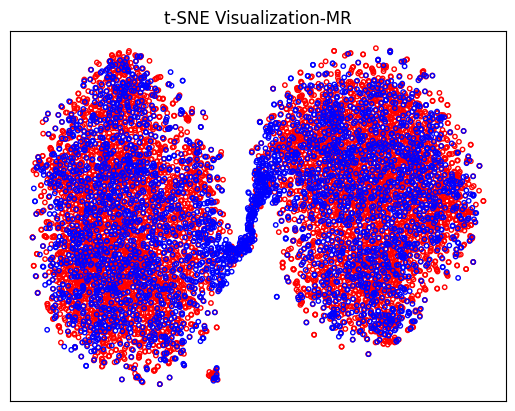

In [ ]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_total)

# Plot the t-SNE results
plt.scatter(X_tsne[:len(Xtrain), 0], X_tsne[:len(Xtrain), 1], label='Train',s=10,facecolors='none', edgecolors='r' )
plt.scatter(X_tsne[len(Xtrain):, 0], X_tsne[len(Xtrain):, 1],  label='Test',s=10, facecolors='none', edgecolors='b')
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_total, cmap='spring', edgecolors='k',s=20)
plt.title('t-SNE Visualization-MR')
plt.xticks([])
plt.yticks([])
plt.show()


In [ ]:
datapath2 = '/content/drive/MyDrive/SBERT_experiments/data/MR/'

In [ ]:
train_data = pd.read_csv(datapath2 + 'train.csv')
val_data = pd.read_csv(datapath2 + 'val.csv')
test_data = pd.read_csv(datapath2 + 'test.csv')

train_data = pd.concat([train_data, val_data], axis = 0, ignore_index= True)
train_data = train_data.rename(columns={"Unnamed: 0": "Index", "text": "text", "label":"label"})

In [ ]:
# train_labels =np.array(train_labels)
train0 = Xtrain[train_data['label'] == 0]
train1 = Xtrain[train_data['label'] == 1]

In [ ]:
# test_labels =np.array(test_labels)
test0 = Xtest[test_data['label']== 0]
test1 = Xtest[test_data['label']== 1]

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Concatenate train and test datasets
train_combined = pd.concat([train0, train1], ignore_index=True)
test_combined = pd.concat([test0, test1], ignore_index=True)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
train_tsne = tsne.fit_transform(train_combined)
test_tsne = tsne.fit_transform(test_combined)

# # Plot t-SNE embeddings
# plt.figure(figsize=(8, 6))

# # Plot train0 and train1 with different colors
# plt.scatter(train_tsne[:len(train0), 0], train_tsne[:len(train0), 1], color='blue', label='Train0', s=10,marker='.')
# plt.scatter(train_tsne[len(train0):, 0], train_tsne[len(train0):, 1], color='red', label='Train1', s=10,marker='.')

# # Plot test0 and test1 with different colors
# # plt.scatter(test_tsne[:len(test0), 0], test_tsne[:len(test0), 1], color='green', label='Test0',s=10, marker='o' )
# # plt.scatter(test_tsne[len(test0):, 0], test_tsne[len(test0):, 1], color='yellow', label='Test1',s=10, marker='o')
# plt.scatter(test_tsne[:len(test0), 0], test_tsne[:len(test0), 1], s=20, label='Test0', facecolors='none', edgecolors='g')
# plt.scatter(test_tsne[len(test0):, 0], test_tsne[len(test0):, 1], s=20, label='Test1', facecolors='none', edgecolors='y')

# plt.title('t-SNE Embeddings')
# plt.legend()
# plt.show()

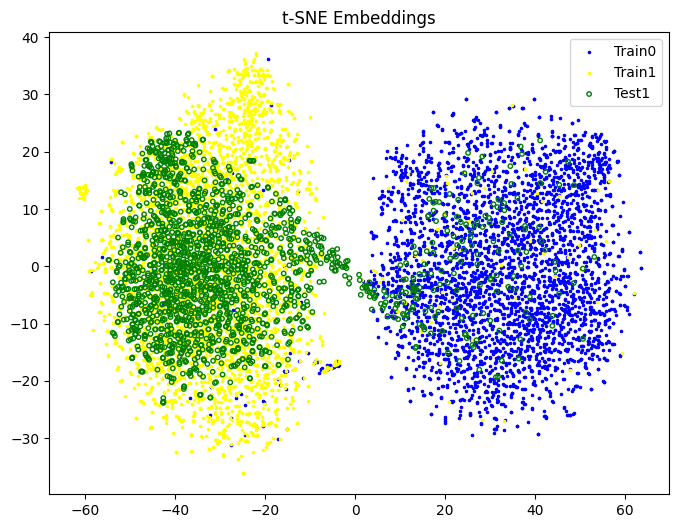

In [ ]:
# Plot t-SNE embeddings
plt.figure(figsize=(8, 6))

# Plot train0 and train1 with different colors
plt.scatter(train_tsne[:len(train0), 0], train_tsne[:len(train0), 1], color='blue', label='Train0', s=10,marker='.')
plt.scatter(train_tsne[len(train0):, 0], train_tsne[len(train0):, 1], color='yellow', label='Train1', s=10,marker='.')

# Plot test0 and test1 with different colors
# plt.scatter(test_tsne[:len(test0), 0], test_tsne[:len(test0), 1], color='green', label='Test0',s=10, marker='o' )
# plt.scatter(test_tsne[len(test0):, 0], test_tsne[len(test0):, 1], color='yellow', label='Test1',s=10, marker='o')
# plt.scatter(test_tsne[:len(test0), 0], test_tsne[:len(test0), 1], s=10, label='Test0', facecolors='none', edgecolors='r')
plt.scatter(test_tsne[len(test0):, 0], test_tsne[len(test0):, 1], s=10, label='Test1', facecolors='none', edgecolors='g')

plt.title('t-SNE Embeddings')
plt.legend()
plt.show()

In [ ]:
from scipy.spatial.distance import cdist
train_coordinates0 = np.column_stack((train_tsne[:len(train0), 0], train_tsne[:len(train0), 1]))
test_coordinates1 = np.column_stack((test_tsne[len(test1):, 0], test_tsne[len(test1):, 1]))

distance_threshold = 0.5  # Adjust this value based on your data and plot

# Calculate pairwise distances between train and test coordinates
distances = cdist(train_coordinates0, test_coordinates1, metric='euclidean')

# Find overlapping points based on distance threshold
overlapping_points = np.argwhere(distances < distance_threshold)

# Get the number of overlapping points
num_overlapping_points = len(overlapping_points)

# Print or use the number of overlapping points
print(f"Number of overlapping points: {num_overlapping_points}")

Number of overlapping points: 254


In [ ]:
len(test1)

1777